In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import pandas as pd
import yfinance as yf
import numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

In [107]:
def data_collection(ticker_file):
    start_date = '2010-01-01'
    end_date = '2020-01-01'
    ticker = pd.read_json(f"{ticker_file}.json")["ticker"].to_list()
    data = yf.download(ticker, start_date, end_date)
    data.to_csv("ticker_data.csv")
    price_df = data['Close']
    price_df.to_csv("portfolio.csv")
    return price_df

In [109]:
data_collection(ticker_file="ticker")

[*********************100%***********************]  20 of 20 completed


Ticker,AAPL,BCS,BKR,BTI,C,CIVVX,FDBAX,GOOGL,HYG,IGLB,JPM,MSFT,NKE,NVDA,ORCL,PFE,RYVLX,SMPIX,UNH,XOM
Date,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,16.894009,41.240002,32.605000,34.000000,11.49,8.79,15.684434,88.529999,50.650002,42.849998,30.950001,16.337500,0.46225,24.850000,17.960152,18.226000,13.210000,31.530001,69.150002
2010-01-05,7.656429,17.824884,43.660000,32.570000,35.299999,11.50,8.83,15.615365,88.949997,51.180000,43.680000,30.959999,16.402500,0.46900,24.820000,17.703985,18.252001,13.190000,31.480000,69.419998
2010-01-06,7.534643,18.129032,45.840000,32.465000,36.400002,11.60,8.83,15.221722,89.180000,51.180000,43.919998,30.770000,16.302500,0.47200,24.459999,17.647058,18.056000,13.140000,31.790001,70.019997
2010-01-07,7.520714,18.801844,46.169998,32.685001,36.500000,11.53,8.85,14.867367,89.540001,51.150002,44.790001,30.450001,16.462500,0.46275,24.379999,17.580645,18.030001,12.960000,33.009998,69.800003
2010-01-08,7.570714,18.967743,47.099998,32.505001,35.900002,11.68,8.87,15.065566,89.680000,51.130001,44.680000,30.660000,16.430000,0.46375,24.680000,17.722960,18.327999,13.230000,32.700001,69.519997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,71.067497,9.380000,25.480000,42.799999,78.589996,15.43,9.54,67.221497,87.830002,66.769997,137.580002,157.380005,100.139999,5.96550,53.439999,37.277039,191.059998,57.369999,294.540009,70.019997
2019-12-26,72.477501,9.420000,25.559999,42.250000,79.830002,15.48,9.55,68.123497,87.959999,66.970001,139.039993,158.669998,100.709999,5.97975,53.570000,37.362431,194.490005,57.490002,295.649994,70.129997
2019-12-27,72.449997,9.450000,25.490000,42.520000,79.669998,15.56,9.55,67.732002,87.919998,67.029999,139.139999,158.960007,101.570000,5.92175,53.459999,37.305504,194.110001,57.250000,295.970001,69.889999


# Preparing the Data

In [110]:
# load data
portfolio_file_path = "portfolio.csv"
portfolio_data = pd.read_csv(portfolio_file_path)

# convert Data column to datetime
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'])
portfolio_data.set_index('Date', inplace=True)

# Calculate daily returns 
returns = portfolio_data.pct_change().dropna()

# Equally-Weighted Portfolio

In [ ]:
# Number of assets
n_assets = returns.shape[1]

# Equal weights
weights_ew = np.array([1/n_assets] * n_assets)

# Portfolio return and volatility
port_return_ew = erk.portfolio_return(weights_ew, returns.mean().values)
port_vol_ew = erk.portfolio_vol(weights_ew, returns.cov().values)

print("Equal-Weighted Portfolio:")
print(f"Return: {port_return_ew}")
print(f"Volatility: {port_vol_ew}")

Equal-Weighted Portfolio:
Return: 0.0005153202102978221
Volatility: 0.01020914621670911


# Global Minimum Volatility Portfolio (GMV)

In [111]:
# Covariance matrix
cov_matrix = returns.cov()

# GMV weights
weights_gmv = erk.gmv(cov_matrix)

#Portfolio return and volatility
port_return_gmv = erk.portfolio_return(weights_gmv, returns.mean())
port_vol_gmv = erk.portfolio_vol(weights_gmv, cov_matrix)

print("GMV Portfolio:")
print(f"Return: {port_return_gmv}")
print(f"Volatility: {port_vol_gmv}")

GMV Portfolio:
Return: 5.782686983932126e-05
Volatility: 0.0020320089227176172


# Maximum Sharpe Ratio Portfolio (MSR)

In [117]:
risk_free_rate = 0.02 # Annualized risk-free rate
risk_free_rate /= 252 # Convert to daily rate

# MSR weights
weights_msr = erk.msr(risk_free_rate, returns.mean(), cov_matrix)

# Portfolio return and volatility
port_return_msr = erk.portfolio_return(weights_msr, returns.mean())
port_vol_msr = erk.portfolio_vol(weights_msr, cov_matrix)

print("MSR Portfolio:")
print(f"Return: {port_return_msr}")
print(f"Volatility: {port_vol_msr}")

MSR Portfolio:
Return: 0.0006931147992111175
Volatility: 0.007389627353999674


# Efficient Frontier

c:\Users\jvris\OneDrive\Desktop\EDHEC_Courses\pct mooc\group_project\edhec_risk_kit.py:36: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if filetype is "returns":
c:\Users\jvris\OneDrive\Desktop\EDHEC_Courses\pct mooc\group_project\edhec_risk_kit.py:39: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "nfirms":
c:\Users\jvris\OneDrive\Desktop\EDHEC_Courses\pct mooc\group_project\edhec_risk_kit.py:42: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  elif filetype is "size":


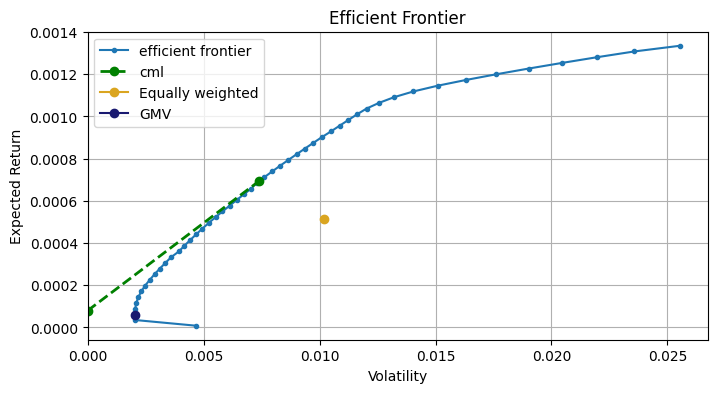

In [119]:
n_points = 50
expected_returns = returns.mean().values
cov_matrix = returns.cov()

# Plot the efficient frontier 
erk.plot_ef(n_points, expected_returns, cov_matrix, riskfree_rate= risk_free_rate,show_cml=True, show_ew=True, show_gmv=True, figsize=(8,4))
plt.title("Efficient Frontier")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.legend()
plt.grid()
plt.show()


# CPPI Strategy

In [149]:
# 4. CPPI Strategy
cppi_results = erk.run_cppi(
    risky_r=returns.mean(axis=1),  # Use the portfolio's average return as the risky asset
    m=3,  # Multiplier
    start=1000,  # Starting portfolio value
    floor=0.8,  # 80% floor of starting value
    riskfree_rate=risk_free_rate,
    drawdown=0.25
)
cppi_wealth = cppi_results["Wealth"].iloc[-1].mean()  # Final wealth for CPPI strategy

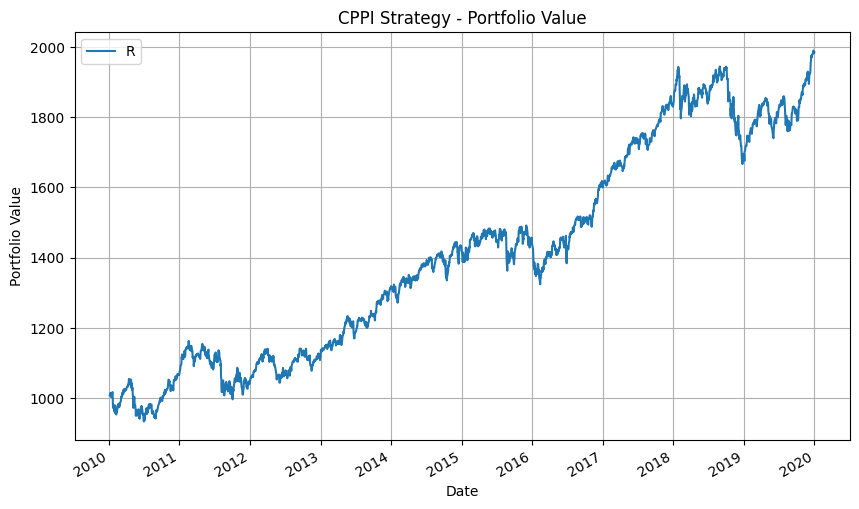

In [150]:
cppi_results["Wealth"].plot(title="CPPI Strategy - Portfolio Value", figsize=(10, 6))
plt.ylabel("Portfolio Value")
plt.grid()
plt.show()

Since, CPPI allcoates weights to risky and safe assets dynamically, it does not have fixed weights for assets over time. As suce Return and volatility for CPPI are not directly computer. We can only make an assumption based on previous returns and volatility

In [173]:
# Calculate daily CPPI portfolio returns
cppi_daily_returns = cppi_results["Wealth"].pct_change().dropna()
# Calculate CPPI return and volatility
cppi_return = cppi_daily_returns.mean()
cppi_volatility = cppi_daily_returns.std()
print(cppi_return.values, cppi_volatility.values)

[0.0002893] [0.0062298]


# Summary Portfolio for Comparision

In [219]:
# Assume an initial investment amount
initial_value = 1000

# 1. Equal Weight Portfolio
port_ew_returns = returns @ weights_ew  # Portfolio returns
final_wealth_ew = initial_value * (1 + port_ew_returns).prod()
sharpe_ew = erk.sharpe_ratio(port_ew_returns, risk_free_rate, periods_per_year=252)
max_drawdown_ew = erk.drawdown(port_ew_returns).Drawdown.min()

# 2. GMV Portfolio
port_gmv_returns = returns @ weights_gmv
final_wealth_gmv = initial_value * (1 + port_gmv_returns).prod()
sharpe_gmv = erk.sharpe_ratio(port_gmv_returns, risk_free_rate, periods_per_year=252)
max_drawdown_gmv = erk.drawdown(port_gmv_returns).Drawdown.min()

# 3. MSR Portfolio
port_msr_returns = returns @ weights_msr
final_wealth_msr = initial_value * (1 + port_msr_returns).prod()
sharpe_msr = erk.sharpe_ratio(port_msr_returns, risk_free_rate, periods_per_year=252)
max_drawdown_msr = erk.drawdown(port_msr_returns).Drawdown.min()

# 4. CPPI Portfolio
sharpe_cppi = erk.sharpe_ratio(cppi_daily_returns, risk_free_rate, periods_per_year=252).values
max_drawdown_cppi = -cppi_results["drawdown"]

In [220]:
comparison = pd.DataFrame({
    "Strategy": ["Equal Weight", "Global Minimum Volatility", "Max Sharpe Ratio", "CPPI"],
    "Return": [port_return_ew, port_return_gmv, port_return_msr, np.nan],  # CPPI doesn't have a traditional return
    "Volatility": [port_vol_ew, port_vol_gmv, port_vol_msr, np.nan],  # CPPI doesn't use volatility directly
    "Final Wealth": [final_wealth_ew, final_wealth_gmv, final_wealth_msr, cppi_wealth],
    "Sharpe Ratio": [sharpe_ew, sharpe_gmv, sharpe_msr, sharpe_cppi],
    "Max Drawdown": [max_drawdown_ew, max_drawdown_gmv, max_drawdown_msr, max_drawdown_cppi],
})

In [221]:
comparison

,Strategy,Return,Volatility,Final Wealth,Sharpe Ratio,Max Drawdown
0,Equal Weight,0.000515,0.010209,3204.142806,0.763064,-0.235345
1,Global Minimum Volatility,0.000058,0.002032,1150.543535,0.436184,-0.112859
2,Max Sharpe Ratio,0.000693,0.007390,5333.377496,1.555964,-0.185914
3,CPPI,NaN,NaN,1984.909316,[0.71059658557362],-0.250000
